# <center> **Car Price Prediction using Linear Regression**
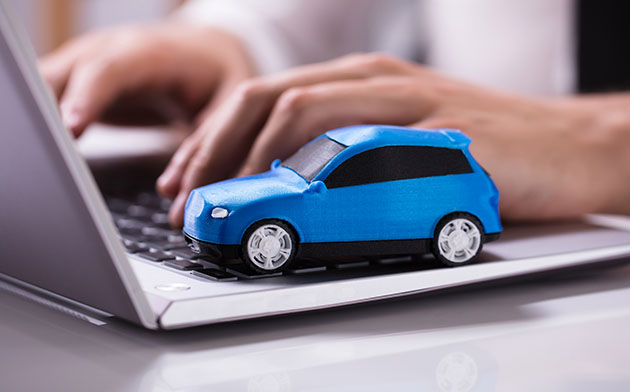

One of the main areas of research in machine learning is the prediction of the price of cars. It is based on finance and the marketing domain. It is a major research topic in machine learning because the price of a car depends on many factors. The price of a car depends on a lot of factors like the goodwill of the brand of the car, features of the car, horsepower and the mileage it gives and many more. 

The dataset we are going to use can be downloaded from here:

https://drive.google.com/uc?export=download&id=1b98fpMld6G-VtcUxC_Ibl_Q-CWo9rCH1 

## Linear Regession - Data Analytics Part

Importing the dataset using Google Colab function or url method 

In [9]:
url = "https://drive.google.com/uc?export=download&id=1b98fpMld6G-VtcUxC_Ibl_Q-CWo9rCH1"

Importing essential libraries for data understanding and Exploratory Data Analysis 

In [10]:
# import essential libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Variables

In [11]:
# importing dataset
df = pd.read_csv(url)
df.head()

,mon_year,KM_driven,Fuel_Type,Horse_Power,Color,Transmission,Engine,Doors,Cylinders,Gears,Sport_Model,selling_price
0,Oct_2006,49805.0,Diesel,90,Metallic,Manual,2000,3,4,5,0,14310.0
1,Oct_2006,77313.0,Diesel,90,Metallic,Manual,2000,3,4,5,0,14575.0
2,Sept_2006,44214.0,Diesel,90,Metallic,Manual,2000,3,4,5,0,14787.0
3,Jul_2006,50880.0,Diesel,90,Non-Metallic,Manual,2000,3,4,5,0,15847.0
4,Mar_2006,40810.0,Diesel,90,Non-Metallic,Manual,2000,3,4,5,0,14575.0


In [13]:
# print the columns(feature variables) of the dataset
print(df.columns)

Index(['mon_year', 'KM_driven', 'Fuel_Type', 'Horse_Power', 'Color',
       'Transmission', 'Engine', 'Doors', 'Cylinders', 'Gears', 'Sport_Model',
       'selling_price'],
      dtype='object')


'selling_price' is our dependent variable which we are going to predict and others are independent variable.

### Missing Data

In [15]:
# To check the missing data
df.isnull()

,mon_year,KM_driven,Fuel_Type,Horse_Power,Color,Transmission,Engine,Doors,Cylinders,Gears,Sport_Model,selling_price
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
1431,False,False,False,False,False,False,False,False,False,False,False,False
1432,False,False,False,False,False,False,False,False,False,False,False,False
1433,False,False,False,False,False,False,False,False,False,False,False,False
1434,False,False,False,False,False,False,False,False,False,False,False,False


In [16]:
# to check total missing values each column
df.isnull().sum()

mon_year         0
KM_driven        0
Fuel_Type        0
Horse_Power      0
Color            0
Transmission     0
Engine           0
Doors            0
Cylinders        0
Gears            0
Sport_Model      0
selling_price    0
dtype: int64

It shows that we don't have any missing values in any columns

### Data Types

In [20]:
# To check the data types of each column
df.dtypes

mon_year          object
KM_driven        float64
Fuel_Type         object
Horse_Power        int64
Color             object
Transmission      object
Engine             int64
Doors              int64
Cylinders          int64
Gears              int64
Sport_Model        int64
selling_price    float64
dtype: object

As you can see here, for continuous variables(variables containing continuous values) we have 'float64' as our dtype while for discrete variables, we have 'object'(category has string values) or 'int64'(category has integer values) as our dtype.

### EDA - Univariate Analysis
If we analyze data over a single variable/column from a dataset, it is known as Univariate Analysis.

In [23]:
# To check percentage count of each Fuel Type
df['Fuel_Type'].value_counts(normalize=True)*100

Fuel_Type
Petrol    88.022284
Diesel    10.793872
CNG        1.183844
Name: proportion, dtype: float64

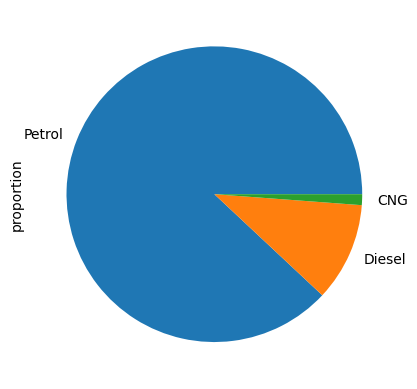

In [24]:
# To check percentage of each Fuel Type and plot a pie chart
df['Fuel_Type'].value_counts(normalize=True).plot.pie()
plt.show()

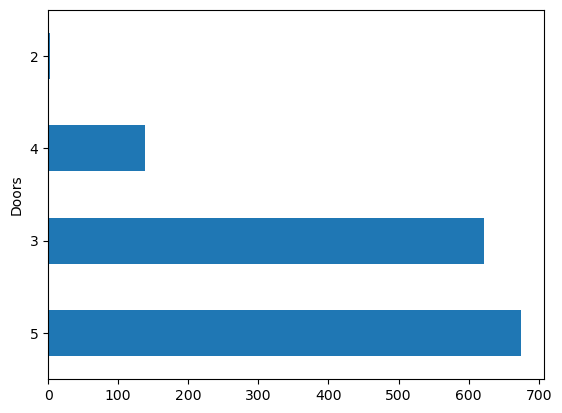

In [27]:
#plot the bar graph of count of doors
df['Doors'].value_counts().plot.barh()
plt.show()

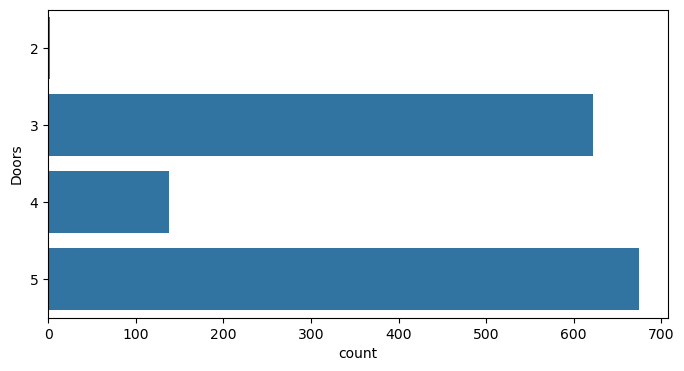

In [30]:
plt.figure(figsize=(8,4))
sns.countplot(y=df['Doors'])
plt.show()

In [31]:
# Show that:
# If the column or variable is of numerical then we can analyze by calculating its mean, median, std, etc.
# dataframe["variable_name"] can also be written as dataframe.variable_name exp:df["KM_driven"] can also be written as df.KM_driven
df["KM_driven"].describe()

count      1436.000000
mean      72645.248607
std       39756.831763
min           1.000000
25%       45580.000000
50%       67193.000000
75%       92242.000000
max      257580.000000
Name: KM_driven, dtype: float64

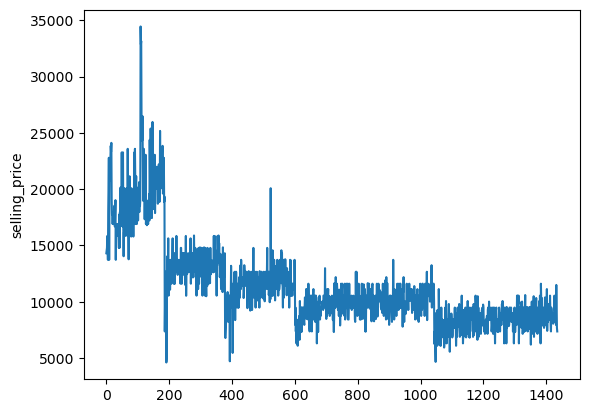

In [33]:
# plot Selling Price column
sns.lineplot(df['selling_price'])
# plt.plot(df.selling_price)
plt.show()

### EDA - Bivariate Analysis
If we analyze data by taking two variables into consideration from a dataset, it is known as Bivariate Analysis.

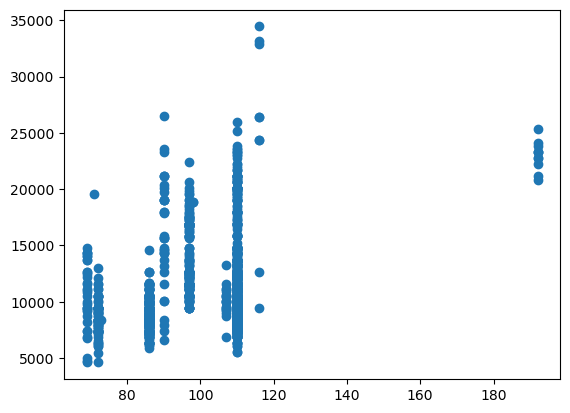

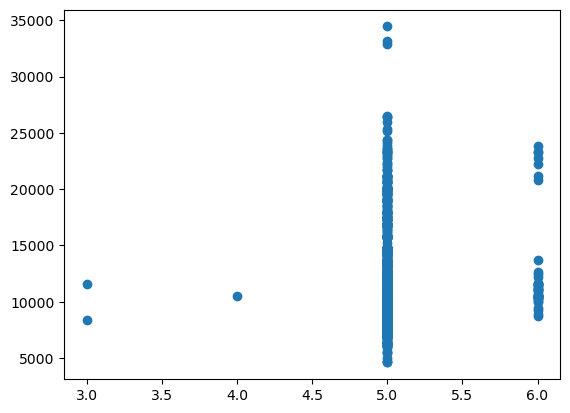

In [39]:
# plot the scatter plot of selling_price and Horse_Power variable in data
plt.scatter(df.Horse_Power,df.selling_price)
plt.show()
# plot the scatter plot of selling_price and Gears variable in data
plt.scatter(x=df.Gears,y=df.selling_price)
plt.show()

<Axes: xlabel='Transmission'>

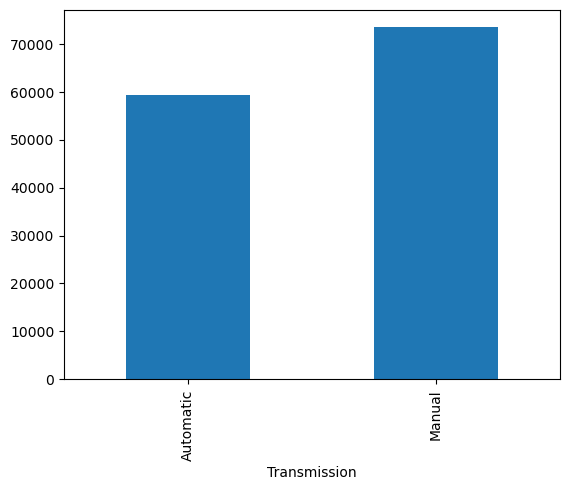

In [40]:
# plot the bar graph of Transmission with average value of KM_driven
df.groupby("Transmission")["KM_driven"].mean().plot.bar()

### EDA - Multivariate Analysis
If we analyze data by taking more than two variables/columns into consideration from a dataset, it is known as Multivariate Analysis.

C:\Users\LABO-INFOS\AppData\Roaming\Python\Python311\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


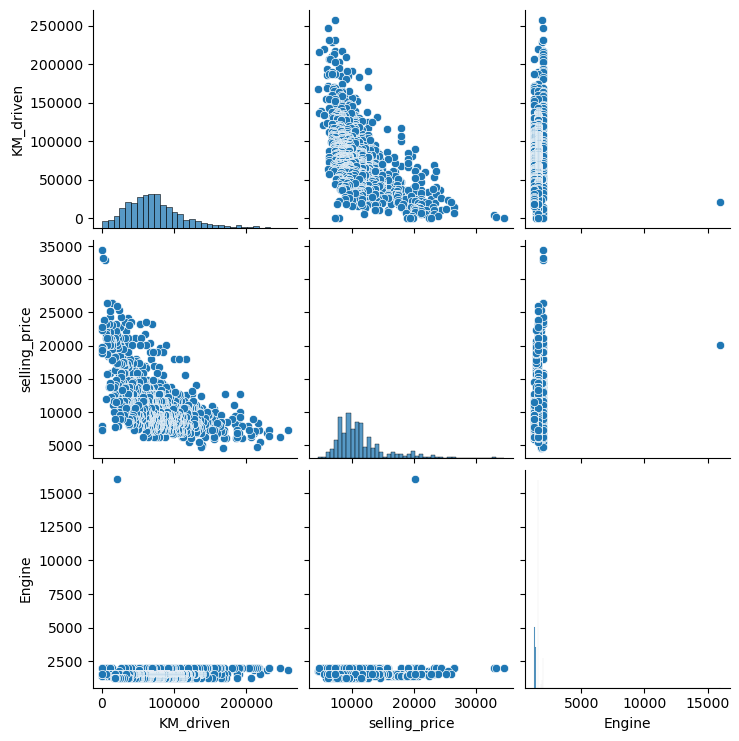

In [41]:
# plot the pair plot of KM_driven, selling_price and Engine
sns.pairplot(data=df,vars=["KM_driven","selling_price","Engine"])
plt.show()

Color  Metallic  Non-Metallic
Doors                        
2      5.000000      5.000000
3      5.071795      5.051724
4      4.979798      5.000000
5      5.004175      4.989744


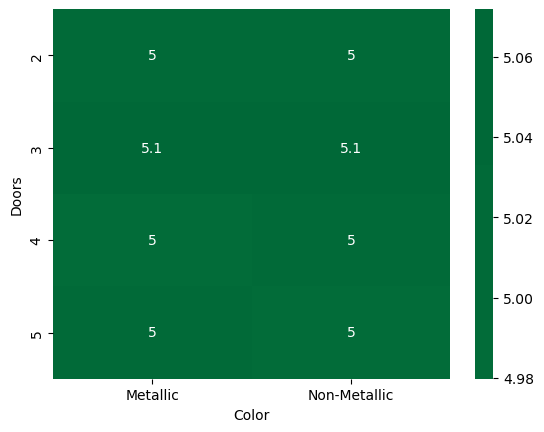

In [43]:
# create pivot table of Doors vs Color vs Gears
result = pd.pivot_table(data=df,index='Doors',columns='Color',values='Gears')
print(result)
# create heat map of Doors vs Color vs Gears
sns.heatmap(result,annot=True,cmap='RdYlGn',center=0.117)
plt.show()

C:\Users\LABO-INFOS\AppData\Roaming\Python\Python311\site-packages\seaborn\axisgrid.py:2100: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\LABO-INFOS\AppData\Roaming\Python\Python311\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


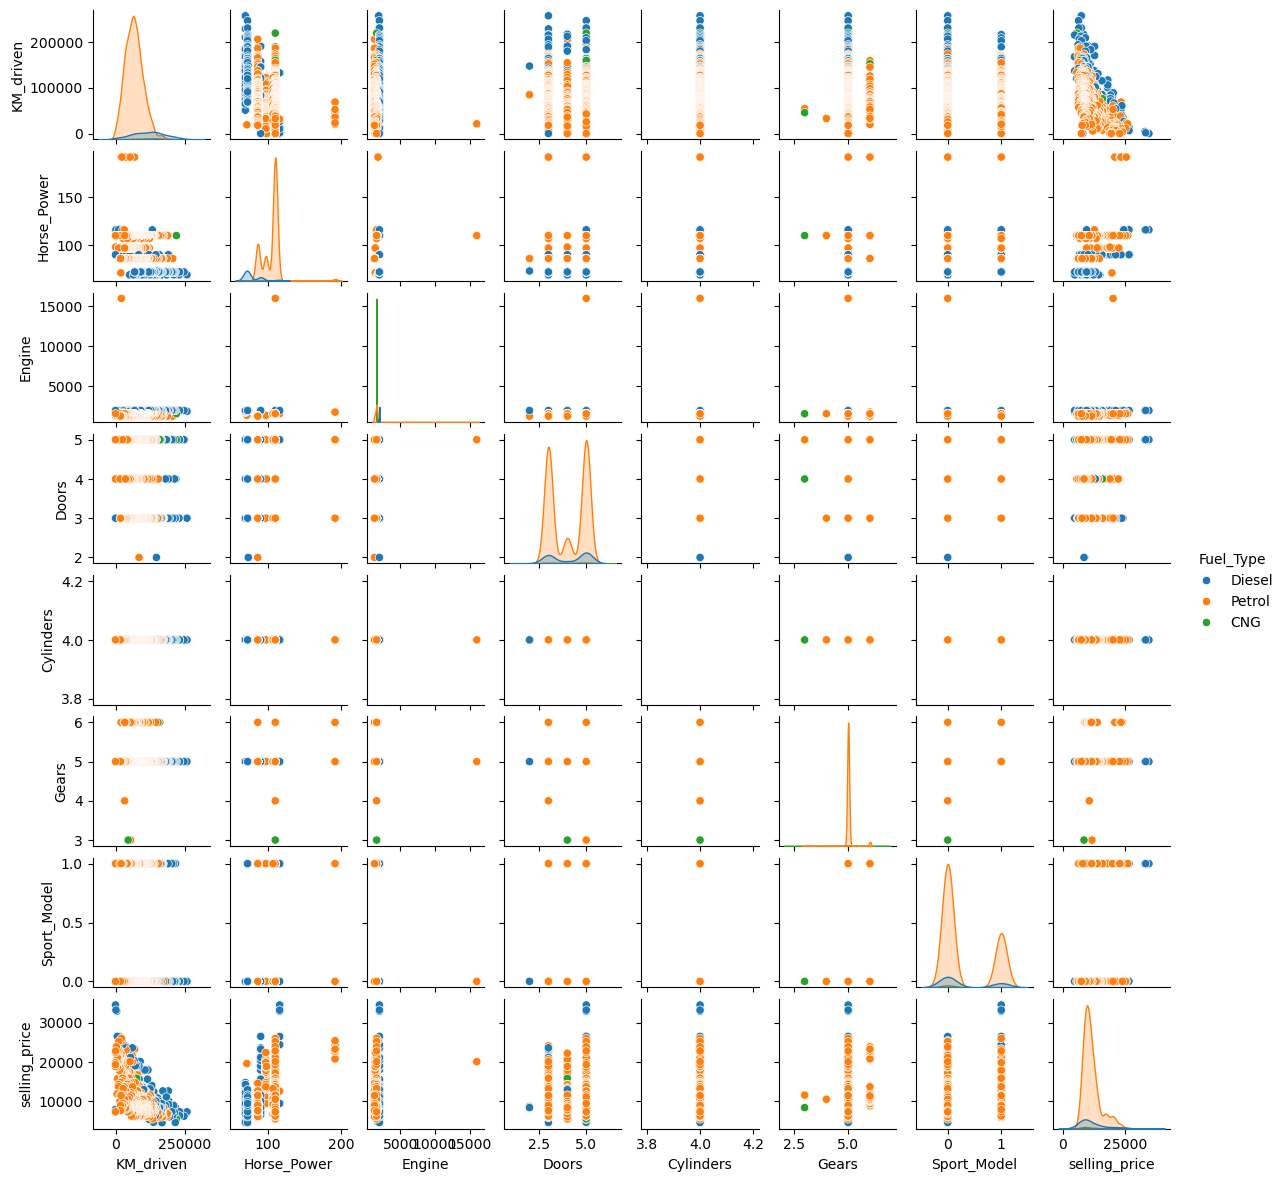

In [44]:
# plot a pairplot
sns.pairplot(df,hue='Fuel_Type',size=1.5)
plt.show()

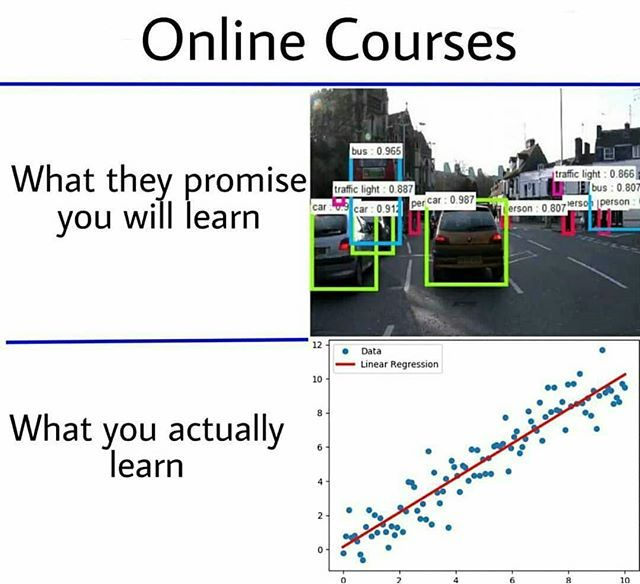

## Data Preprocessing

### Feature Processing
Look at the feature mon_year, it has discrete values but they ranges very widely and hence doesn't make sense as a variable for our model. Instead if we can try to change the variable into something meaningful sense such how much old is the car, or in which month or in which year the car was sold then it would be more useful as a feature in the data. This kind of preprocessing of feature to make them more meaningful is called feature preprocessing. 

In [45]:
# check the value_counts for mon_year column
df.mon_year.value_counts()

mon_year
Jan_2003    69
Apr_2003    63
Jan_2002    59
Mar_2002    47
Jul_2003    42
            ..
Jul_2008     2
Aug_2008     2
Nov_2007     1
Mar_2007     1
Mar_2008     1
Name: count, Length: 77, dtype: int64

In [46]:
# split the object from '_'. We will build two new features from this existing one.
df['mon'] = df['mon_year'].str.split("_",expand=True)[0] 
df['year'] = df['mon_year'].str.split("_",expand=True)[1]

# drop the previous column
df.drop('mon_year',axis=1, inplace=True)
# check how these two new features look in data frame
df.head()

,KM_driven,Fuel_Type,Horse_Power,Color,Transmission,Engine,Doors,Cylinders,Gears,Sport_Model,selling_price,mon,year
0,49805.0,Diesel,90,Metallic,Manual,2000,3,4,5,0,14310.0,Oct,2006
1,77313.0,Diesel,90,Metallic,Manual,2000,3,4,5,0,14575.0,Oct,2006
2,44214.0,Diesel,90,Metallic,Manual,2000,3,4,5,0,14787.0,Sept,2006
3,50880.0,Diesel,90,Non-Metallic,Manual,2000,3,4,5,0,15847.0,Jul,2006
4,40810.0,Diesel,90,Non-Metallic,Manual,2000,3,4,5,0,14575.0,Mar,2006


In [48]:
# check the counts of year 
print(df.year.value_counts())
# check the counts of months
print(df.mon.value_counts())

year
2003    441
2002    392
2004    225
2005    192
2006     87
2007     75
2008     24
Name: count, dtype: int64
mon
Jan     207
Apr     154
Mar     138
Feb     134
Jul     133
Jun     120
May     118
Aug     115
Oct     101
Sept     76
Nov      72
Dec      68
Name: count, dtype: int64


### Encoding Categories
Encoding categorical variables is very important if not crucial this is because machine learning models are mathematical models that use algorithms that work with numerical data types. This is why, we need encoding methods to convert non-numerical data to meaningful numerical data. For this we look at Pandas get_dummies method.

In [54]:
# check encoding on Fuel_Type column using pandas get_dummies method
pd.get_dummies(df['Fuel_Type']).astype(int)


,CNG,Diesel,Petrol
0,0,1,0
1,0,1,0
2,0,1,0
3,0,1,0
4,0,1,0
...,...,...,...
1431,0,0,1
1432,0,0,1
1433,0,0,1
1434,0,0,1


In [58]:
# create dummies for categorical variables and print them
dummies = pd.get_dummies(df[['Fuel_Type','Color','Transmission','mon','year']]).astype(int)
print(dummies)
# concat the created dummies with the original df and drop those categorical columns
encoded_df = pd.concat([df,dummies],axis=1)
encoded_df.drop(['Fuel_Type','Color','Transmission','mon','year'],axis=1,inplace=True)
encoded_df.head()

      Fuel_Type_CNG  Fuel_Type_Diesel  Fuel_Type_Petrol  Color_Metallic  \
0                 0                 1                 0               1   
1                 0                 1                 0               1   
2                 0                 1                 0               1   
3                 0                 1                 0               0   
4                 0                 1                 0               0   
...             ...               ...               ...             ...   
1431              0                 0                 1               1   
1432              0                 0                 1               0   
1433              0                 0                 1               0   
1434              0                 0                 1               1   
1435              0                 0                 1               0   

      Color_Non-Metallic  Transmission_Automatic  Transmission_Manual  \
0                      0  

,KM_driven,Horse_Power,Engine,Doors,Cylinders,Gears,Sport_Model,selling_price,Fuel_Type_CNG,Fuel_Type_Diesel,...,mon_Nov,mon_Oct,mon_Sept,year_2002,year_2003,year_2004,year_2005,year_2006,year_2007,year_2008
0,49805.0,90,2000,3,4,5,0,14310.0,0,1,...,0,1,0,0,0,0,0,1,0,0
1,77313.0,90,2000,3,4,5,0,14575.0,0,1,...,0,1,0,0,0,0,0,1,0,0
2,44214.0,90,2000,3,4,5,0,14787.0,0,1,...,0,0,1,0,0,0,0,1,0,0
3,50880.0,90,2000,3,4,5,0,15847.0,0,1,...,0,0,0,0,0,0,0,1,0,0
4,40810.0,90,2000,3,4,5,0,14575.0,0,1,...,0,0,0,0,0,0,0,1,0,0


In [65]:
# Creating X and Y
y = encoded_df['selling_price']
X = encoded_df.drop('selling_price',axis=1)
y.head(),X.head()

(0    14310.0
 1    14575.0
 2    14787.0
 3    15847.0
 4    14575.0
 Name: selling_price, dtype: float64,
    KM_driven  Horse_Power  Engine  Doors  Cylinders  Gears  Sport_Model  \
 0    49805.0           90    2000      3          4      5            0   
 1    77313.0           90    2000      3          4      5            0   
 2    44214.0           90    2000      3          4      5            0   
 3    50880.0           90    2000      3          4      5            0   
 4    40810.0           90    2000      3          4      5            0   
 
    Fuel_Type_CNG  Fuel_Type_Diesel  Fuel_Type_Petrol  ...  mon_Nov  mon_Oct  \
 0              0                 1                 0  ...        0        1   
 1              0                 1                 0  ...        0        1   
 2              0                 1                 0  ...        0        0   
 3              0                 1                 0  ...        0        0   
 4              0                 

**Creating Training and Testing datasets** 

We will use sklearn library for this task. We will train_test_split method from sklearn's model_selection. 

test_size is the ratio in which we want to split. Generally, it's between 0.2 and 0.33. During using this method, the data is shuffled so random_state decides which state we want to keep so that everytime we run train_test_split, it doesn't randomly split the data and keeps it same.

In [68]:
# Splitting Data into training and testing set
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=42)

## Linear Regression - Model Fitting

### Simple Regression
We know structure of simple linear regression. \\
Y = A*X + B, \\
where X is independent variable. For simple linear regression, we will use 'KM_driven' variable.  

In [69]:
# initializing Linear Regression model using sklearn
from sklearn.linear_model import LinearRegression
simple_lr = LinearRegression()

In [70]:
# Fitting the training data
simple_lr.fit(X_train[['KM_driven']],y_train)

LinearRegression()

In [71]:
# Generating Predictions
y_test_predictions = simple_lr.predict(X_test[['KM_driven']])
y_test_predictions

array([14089.68761496, 10741.2876541 ,  7875.71778434, 10997.15379228,
       11979.82809108,  9952.09439926, 10774.17070639, 12080.22228553,
       12387.62156535, 13229.05688335,  9997.35631203, 11987.89888998,
       12615.67616677, 14002.32667009, 10643.67461332, 11922.02372056,
       13105.65000554,  9595.39780723,  7990.99933082, 11690.80623849,
       12691.14904299, 15014.55754324, 11228.37127435, 13135.91550142,
        9646.05843007, 14085.32502096, 10785.56798321,  8219.27206194,
       13702.07113795, 13730.42799895, 10465.35358352, 12261.65166356,
       11143.95508042, 11331.3830252 , 11854.62164324, 10543.38948372,
       10740.57873258, 11288.84773369, 13633.03308787,  9057.98075869,
       12095.43683211, 11793.43626237, 10651.0364907 ,  6939.45057923,
       11112.76253331, 13129.26254557, 11141.66471857, 11174.71136813,
       12638.08899345, 13971.02505813, 13676.98622244, 11565.4907258 ,
       12090.47438143, 14749.25729554,  8275.87671911,  9846.30149473,
      

In [73]:
# Print A and B of Simple Linear Regression line
simple_lr.coef_, simple_lr.intercept_

(array([-0.05453243]), 15390.285951605729)

So, simple_lr.coef_ returns array of coefficients and simple_lr.intercept_ returns the intercept of our equation. With this, we have A = -0.05453243 and B = 15390.285951605727. (Not necessary it's same as given in our Material Handout)

### Intepreting results - Analyzing training and testing errors

In [75]:
# To check Regression model training accuracy using sklearn
simple_lr.score(X_train[["KM_driven"]],y_train)

0.32375185502402526

model.score returns the mean accuracy on the given data and labels. In our case, simple_lr.score(X_train,y_train) returns mean accuracy of predictions made by X_train and comparing it with y_train.

In [76]:
# check the accuracy on test data
simple_lr.score(X_test[["KM_driven"]],y_test)

0.3265435200011403

Here, simple_lr predicts X_test and calculates mean accuracy with y_test. Therefore, with Simple Linear Regression we obtain score of 0.33 which is very less. So, lets now move towards Multiple Linear Regression approach. 

## Multiple Linear Regression

In [77]:
# initializing Linear Regression model using sklearn
multiple_lr = LinearRegression()

In [78]:
# Fitting the training data
multiple_lr.fit(X_train,y_train)

LinearRegression()

In [79]:
# print the coefficients and intercept for the model
multiple_lr.coef_,multiple_lr.intercept_

(array([-1.61236903e-02,  4.73257381e+01,  2.24912417e-02,  2.47454756e+02,
        -1.15960574e-10,  7.49344942e+02,  4.24811452e+00, -6.86216323e+02,
         1.21640900e+03, -5.30192674e+02,  4.89371680e+01, -4.89371680e+01,
         4.41930267e+02, -4.41930267e+02,  2.73747507e+01,  1.03030610e+02,
         1.32447818e+02, -1.42214319e+02, -3.48304508e+02, -1.19448330e+02,
         2.48844414e+02, -1.76254698e+01,  2.64958457e+02, -8.77376684e+01,
        -4.78169141e+01, -1.35088385e+01, -5.36364753e+03, -4.06337192e+03,
        -2.84143849e+03, -1.57512814e+03,  2.52443344e+03,  4.62145040e+03,
         6.69770224e+03]),
 6563.517662049951)

In [80]:
# Generating Predictions
y_test_predictions = multiple_lr.predict(X_test)
y_test_predictions

array([11406.06836889,  9584.98476661,  9242.8795565 ,  9155.75862243,
       10723.90045647,  8546.27662682, 10048.25229716,  9293.85709449,
       13535.6645988 , 13303.70081408,  9859.93489553,  9953.57232718,
       13328.43173462, 12620.30564526, 10007.45847928,  9171.45719574,
       12749.67448668, 17304.91656334,  7922.86208192,  9360.85196322,
       13149.02180701, 20009.60264706,  8661.53066554, 11128.01354996,
        7793.97771578, 18032.1158418 , 10041.14353561,  7772.12502391,
       17540.89752313, 13932.69434908,  8654.45840621, 10980.75788306,
        9495.82492459, 10059.94681394, 10214.6536225 ,  8823.34521099,
       10207.90917391,  9988.0521897 , 17167.78880591,  9713.17004842,
       10586.76528127, 10271.75450671,  8959.02415477,  6521.5714569 ,
        7853.37568882, 19475.02111801, 10316.62786625, 10468.61220947,
        9506.77270042, 13729.16993368, 13178.28411146,  7385.83752901,
       16777.56206212, 17692.76015323,  6646.2963272 ,  8849.92382084,
      

### Intepreting results - Analyzing training and testing errors

In [81]:
# To check Regression model training accuracy using sklearn
multiple_lr.score(X_train,y_train)

0.8893954094764038

In [82]:
# check the accuracy on test data
multiple_lr.score(X_test,y_test)

0.8859958571373611

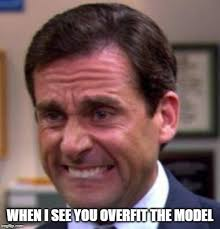

Here, we can see that multiple_lr gives us better results than simple_lr as many other independent variables are also being considered when it comes to predict selling prices of cars. But can we improve more, so to check that lets move towards Lasso and Ridge Regression approach. 

## Lasso Regression

In [83]:
# initializing Lasso Regression model using sklearn
# set value of alpha 0.01
from sklearn.linear_model import Lasso
lasso_lr = Lasso(alpha=0.01)

In [84]:
# Fitting the training data
lasso_lr.fit(X_train,y_train)

Lasso(alpha=0.01)

In [85]:
# print the coefficients and intercept for the model
lasso_lr.coef_,lasso_lr.intercept_

(array([-1.61261129e-02,  4.73257483e+01,  2.25597991e-02,  2.47443203e+02,
         0.00000000e+00,  7.49095968e+02,  4.32391425e+00, -1.55182889e+02,
         1.74662539e+03, -0.00000000e+00,  9.78458123e+01, -0.00000000e+00,
         8.83554901e+02, -8.61059513e-13,  4.09935682e+01,  1.16648618e+02,
         1.45861538e+02, -1.28351708e+02, -3.34487067e+02, -1.05588995e+02,
         2.62409271e+02, -3.79452654e+00,  2.78563004e+02, -7.38433786e+01,
        -3.39669226e+01,  7.05913461e-04, -4.66515386e+03, -3.36489432e+03,
        -2.14298313e+03, -8.76648728e+02,  3.22257405e+03,  5.31955724e+03,
         7.39516959e+03]),
 4831.679153114729)

In [87]:
# Generating Predictions
y_test_predictions = lasso_lr.predict(X_test)
y_test_predictions

array([11406.33580659,  9585.09764361,  9242.9368847 ,  9155.90837992,
       10723.87514981,  8546.34740736, 10048.40025202,  9293.83262792,
       13535.42559827, 13303.9029149 ,  9859.99161796,  9953.74058458,
       13328.65175601, 12620.61243389, 10007.36758646,  9171.47889072,
       12749.62764576, 17304.85054221,  7922.6694135 ,  9361.03253605,
       13148.99905684, 20009.56494319,  8661.72327576, 11128.23874819,
        7793.61036782, 18031.81854944, 10041.04570184,  7772.25962372,
       17540.63088963, 13932.51500241,  8654.37566038, 10980.71576289,
        9495.69606948, 10060.11845621, 10214.84850952,  8823.2127815 ,
       10207.81184311,  9987.98581856, 17167.8088485 ,  9713.25545708,
       10586.76153198, 10271.71550164,  8959.17115549,  6521.36243448,
        7853.32354118, 19474.92201313, 10316.54563562, 10468.79808442,
        9506.80076978, 13729.45016611, 13178.64704255,  7385.98227775,
       16777.37443057, 17692.80338693,  6646.41262951,  8850.07920347,
      

### Intepreting results - Analyzing training and testing errors

In [88]:
# To check Regression model training accuracy using sklearn
lasso_lr.score(X_train,y_train)

0.8893954061141324

In [89]:
# check the accuracy on test data
lasso_lr.score(X_test,y_test)

0.8859913963573948

## Ridge Regression

In [91]:
# initializing Lasso Regression model using sklearn
# set value of alpha 0.01
from sklearn.linear_model import Ridge
ridge_lr = Ridge(alpha=0.001)

In [92]:
# Fitting the training data
ridge_lr.fit(X_train,y_train)

Ridge(alpha=0.001)

In [93]:
# print the coefficients and intercept for the model
ridge_lr.coef_,ridge_lr.intercept_

(array([-1.61248433e-02,  4.73263875e+01,  2.24961251e-02,  2.47464337e+02,
         0.00000000e+00,  7.49310295e+02,  4.29260998e+00, -6.86179354e+02,
         1.21643405e+03, -5.30254697e+02,  4.89407239e+01, -4.89407240e+01,
         4.41917663e+02, -4.41917662e+02,  2.73744665e+01,  1.03040450e+02,
         1.32415628e+02, -1.42185087e+02, -3.48280404e+02, -1.19440627e+02,
         2.48831885e+02, -1.76278045e+01,  2.64957420e+02, -8.77479224e+01,
        -4.78207522e+01, -1.35172522e+01, -5.36350037e+03, -4.06324415e+03,
        -2.84131508e+03, -1.57502407e+03,  2.52443688e+03,  4.62139630e+03,
         6.69725048e+03]),
 6563.582931531522)

In [94]:
# Generating Predictions
y_test_predictions = ridge_lr.predict(X_test)
y_test_predictions

array([11406.11672831,  9584.99251612,  9242.87271454,  9155.78238537,
       10723.92205292,  8546.30623748, 10048.27545116,  9293.88739472,
       13535.6463243 , 13303.75662354,  9859.94607875,  9953.60643285,
       13328.47970407, 12620.31416818, 10007.4499005 ,  9171.49296554,
       12749.66246338, 17304.87397709,  7922.81680399,  9360.89039154,
       13149.00333648, 20009.51205106,  8661.53454631, 11128.02459412,
        7793.92751214, 18032.06472571, 10041.13856472,  7772.12693137,
       17540.8726281 , 13932.70446453,  8654.4654417 , 10980.80267405,
        9495.84310054, 10059.93909676, 10214.65696776,  8823.33152754,
       10207.9021008 ,  9988.07638113, 17167.75323452,  9713.13785833,
       10586.80952267, 10271.76011232,  8959.07367087,  6521.50191164,
        7853.40148877, 19474.96113993, 10316.61893888, 10468.61392612,
        9506.80425282, 13729.24655825, 13178.34117335,  7385.86503852,
       16777.45730144, 17692.74635704,  6646.28238152,  8849.96925109,
      

### Intepreting results - Analyzing training and testing errors

In [95]:
# To check Regression model training accuracy using sklearn
ridge_lr.score(X_train,y_train)

0.8893954091466826

In [96]:
# check accuracy on test data
ridge_lr.score(X_test,y_test)

0.8859930745728466

## ElasticNet Regression

In [97]:
# initializing Lasso Regression model using sklearn
# set value of alpha 0.01
from sklearn.linear_model import ElasticNet
ENet_lr = ElasticNet(alpha=0.00001)

In [98]:
# Fitting the training data
ENet_lr.fit(X_train,y_train)

C:\Users\LABO-INFOS\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.565e+08, tolerance: 1.548e+06
  model = cd_fast.enet_coordinate_descent(


ElasticNet(alpha=1e-05)

In [99]:
# print the coefficients and intercept for the model
ENet_lr.coef_,ENet_lr.intercept_

(array([-1.61310200e-02,  4.73309059e+01,  2.25041310e-02,  2.47513172e+02,
         0.00000000e+00,  7.49139347e+02,  4.51329332e+00, -2.42367576e+02,
         1.66041901e+03, -8.68176436e+01,  9.57705077e+01, -2.14895774e+00,
         8.08453057e+02, -7.53013471e+01,  3.64111739e+01,  1.12135519e+02,
         1.41283156e+02, -1.32996644e+02, -3.39125070e+02, -1.10367148e+02,
         2.57813735e+02, -8.59915661e+00,  2.73991438e+02, -7.87654489e+01,
        -3.88030770e+01, -4.51881129e+00, -4.73124438e+03, -3.43109869e+03,
        -2.20922092e+03, -9.43042044e+02,  3.15588859e+03,  5.25258274e+03,
         7.32648137e+03]),
 5066.165617766931)

In [101]:
# Generating Predictions
y_test_predictions = ENet_lr.predict(X_test)
y_test_predictions

array([11406.34415163,  9585.0341761 ,  9242.88038511,  9155.92356921,
       10724.0450244 ,  8546.46670902, 10048.40277897,  9294.06992836,
       13535.52088154, 13304.01429382,  9860.00114521,  9953.78929293,
       13328.70100701, 12620.32573798, 10007.42023961,  9171.65957657,
       12749.5746456 , 17304.66031238,  7922.59721394,  9361.1101434 ,
       13148.89090888, 20009.0456859 ,  8661.57720517, 11128.06113838,
        7793.65466928, 18031.77044884, 10041.13615185,  7772.13228955,
       17540.69259449, 13932.73111762,  8654.52611467, 10981.05394624,
        9495.96508707, 10059.90993657, 10214.68707331,  8823.28782028,
       10207.87388882,  9988.20583457, 17167.51383629,  9712.96665148,
       10587.05176294, 10271.80231978,  8959.34641811,  6521.12181787,
        7853.53211159, 19474.6326063 , 10316.58463302, 10468.62948795,
        9506.95909574, 13729.62137768, 13178.60788974,  7385.99974088,
       16776.86867297, 17692.6422362 ,  6646.18330663,  8850.21173715,
      

### Intepreting results - Analyzing training and testing errors

In [102]:
# To check Regression model training accuracy using sklearn
ENet_lr.score(X_train,y_train)

0.8893953973683683

In [103]:
# check accuracy on test data
ENet_lr.score(X_test,y_test)

0.8859801497759382

Here, we looked at different Regression Approaches to deal with our dataset. We obtained better results with Multiple Linear Regression than Simple Linear Regression because selling_price is also dependent on many other dependent variables. We also found that accuracy for Regularized and Multiple Regression were same, stating that our model wasn't going through overfitting and therefore also gave high testing accuracy.

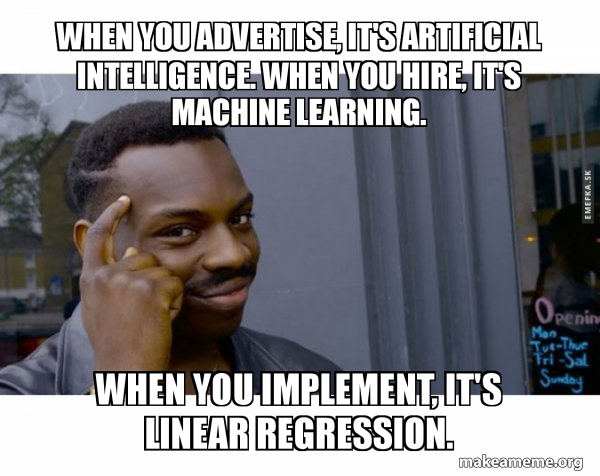

## **CONGRATULATIONS!**

YOU'VE SUCCESSFULLY BUILD CAR PRICE PREDICTION MODEL, FIRST MACHINE LEARNING PROJECT FOR YOUR RESUME!
